### unsupervised-learning-kmeans

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

## Example with generated data

Problem: customer segmentation for a marketing campaign of an app. For a group of 20 people, we have their age and their weekly hours of app usage
Question might be: Which people to treat with same campaign as they are probably similar to each other?

In [51]:
age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]

In [52]:
# creating a dataframe
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


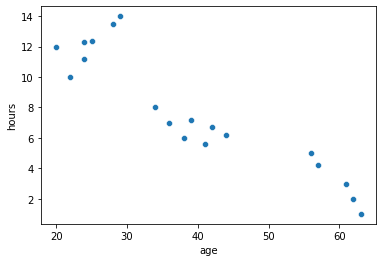

In [53]:
# plotting the data
sns.scatterplot(x = df['age'], y = df['hours'])
plt.show()

#### Using two clusters

In [54]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
# depends on data or maybe also on goals I want to reach.

KMeans(n_clusters=3)

In [56]:
# Predicting / assigning the clusters:
df_cl = df
#kmeans.predict(df)
df_cl['clusters'] = kmeans.predict(df) #creating a new variable which includes predcited clusters
df_cl


,age,hours,clusters
0,20,12.0,0
1,22,10.0,0
2,24,11.2,0
3,24,12.3,0
4,25,12.4,0
5,28,13.5,0
6,29,14.0,0
7,34,8.0,2
8,36,7.0,2
9,38,6.0,2


In [57]:
# Check the size of the clusters
print(df_cl['clusters'].value_counts().sort_index())

0    7
1    5
2    7
Name: clusters, dtype: int64


[0 1 2]


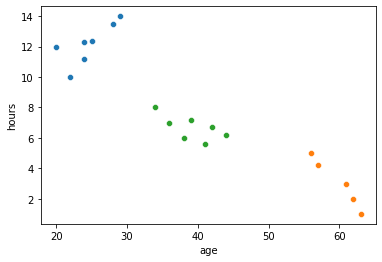

In [58]:
clusterval = np.unique(df['clusters'])
print(clusterval)
for cluster in clusterval:
    sns.scatterplot(x = df_cl[df_cl['clusters']==cluster]['age'], y = df_cl[df_cl['clusters']==cluster]['hours'])
plt.show()

#### Using different number of clusters - Repeat all steps from before with the different values for k

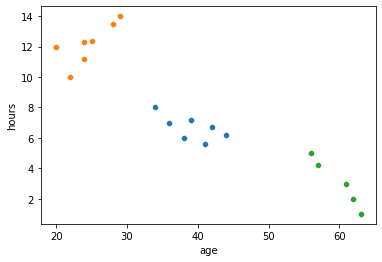

In [59]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

df_cl['clusters'] = kmeans.predict(df)

clusterval = np.unique(df['clusters'])
for cluster in clusterval:
    sns.scatterplot(x = df_cl[df_cl['clusters']==cluster]['age'], y = df_cl[df_cl['clusters']==cluster]['hours'])
plt.show()

## Using data

In [60]:
from sklearn import datasets

data = datasets.load_wine()
print(data.keys())
print(data['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:     

In [61]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
#this data ALSO has a target variable for supervised learning problems, but this is not what we are interested in here therefore we do not use it!

In [62]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [63]:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler # makes mean ~ 0 and Std ~ 1 (but does not necessarily create normal distribution!!)
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep, columns = X.columns).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [64]:
pd.DataFrame(X_prep).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [65]:
round(pd.DataFrame(X_prep).describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-4.0,-3.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
max,2.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0


#### We will run a K-Means clustering with 8 clusters (random choice).

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

For best practice, we will also specifiy a value for random_state. Specifying this is just used for reproducing the same results on every run - since the K-Means algorithm is stochastic, we will otherwise get slightly different results each time even if parameters are the same, so fixing it makes it easier to compare. 

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state = 1234)
kmeans.fit(X_prep)

#random_state: Doing it for train and test set, we will get same train and test data again and again
#when using it for kmeans, it will give us same result of k-means, otherwise clusters might change when running two times
# this means it will use the same centroids

KMeans(random_state=1234)

In [67]:
help(KMeans)

# init: options how to choose centroids for hyperparamter tuning

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [68]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep) # gives us the cluster labels

# Check the size of the clusters
print(pd.Series(clusters).value_counts().sort_index())

# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head(20)

#!! in this case clusters where attached to orginal data, not to standardized one. Makes interpretation of clusters possible

0    18
1    23
2    17
3    29
4    23
5    26
6     4
7    38
dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,7
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,7
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,7
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,7
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,7
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,7
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,7
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,7


#### Basic Performance value: 'inertia'.
'Inertia' is the mean squared distance between each instance and its closest centroid.

In [69]:
kmeans.inertia_

938.6711756898961

### Choosing a value for K

Elbow plot using inertia

[1, 2, 3, 4, 5, 6, 7, 8]
[2313.999999999999, 1658.758852429096, 1277.928488844643, 1182.7435177151144, 1110.493161485679, 1048.1806943123318, 985.2282631071001, 938.6711756898961]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

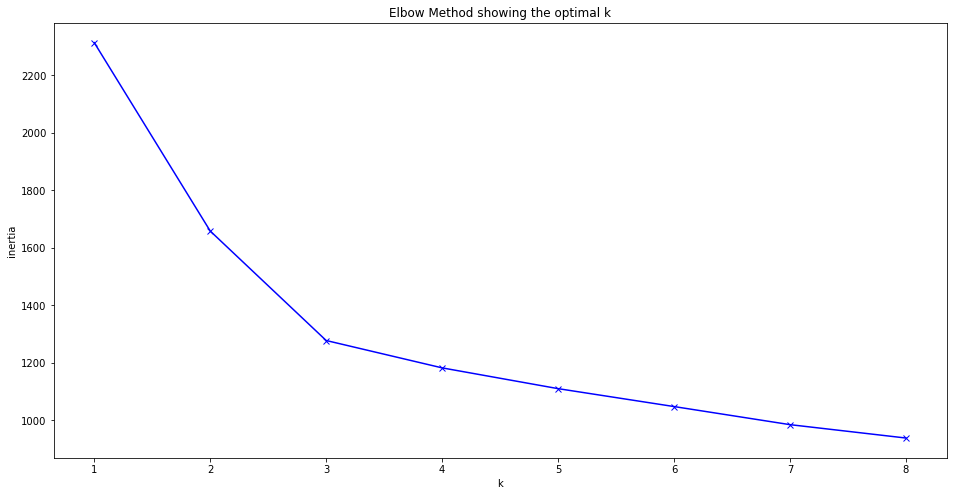

In [70]:
K = range(1, 9)
print(list(K))
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

print(inertia)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at k=3.
Do not take this plot as the ultimate source of truth, but also look at your business needs - what if our business needs involve having a k between say 4 and 8?

There is also another metric that will help us decide.

#### Silhouette Score

[2, 3, 4, 5, 6, 7, 8]
[0.25931695553182554, 0.2848589191898987, 0.2472914654135894, 0.2530132452438398, 0.2007058222128914, 0.19862052942898747, 0.14621046375905294]


Text(0.5, 1.0, 'Silhouette Score showing the optimal k')

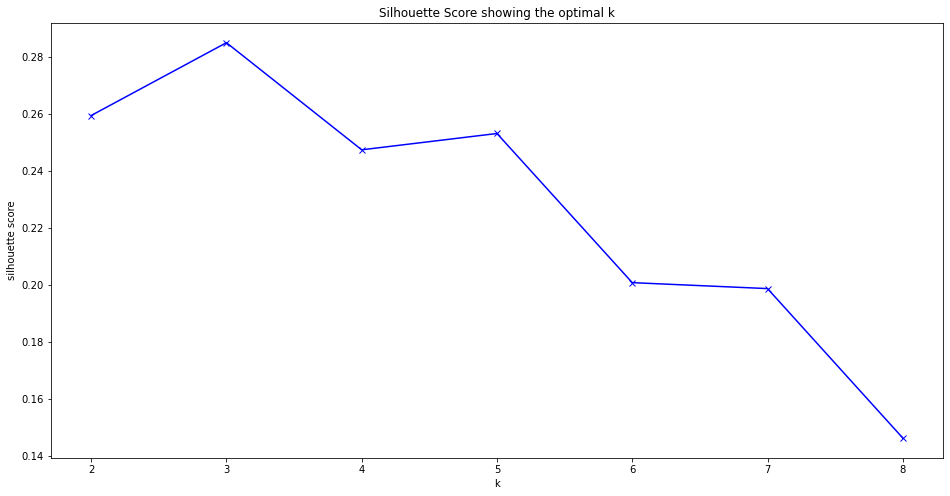

In [71]:
from sklearn.metrics import silhouette_score

K = range(2, 9)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score showing the optimal k')

You can see that the silhouette score also has an upward spike at 3! If our business requires us to have between 4 and 8 clusters, then according to this plot 5 would be the optimal number, as for 5 clusters are better seperated!

## Hierarchical Clustering (Agglomerative)

In [72]:
### Continued Example: App Usage Data

age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


In [73]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = None, distance_threshold = 1)
# default is a cluster of 2

In [74]:
help(AgglomerativeClustering)

# n_clusters as the most important parameter
# we can choose amount of clusters by giving a number or by specifing maximum amount of distance we agree with (distance_threshold),
# above this threshold there wont joint things together anymore. In that case you than do not have to define number of clusters.

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed", a dis

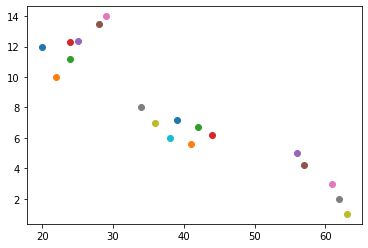

In [75]:
# fit model and predict clusters
df['clusters'] = model.fit_predict(df) # we can do fit and predict at same time or split it up like before (similar transformer algs from sklearn, where you can do fit and transform at same time or seperately )
# create scatter plot for samples from each cluster
clusterval = df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(df[df['clusters']==cluster]['age'], df[df['clusters']==cluster]['hours'])
plt.show()

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage

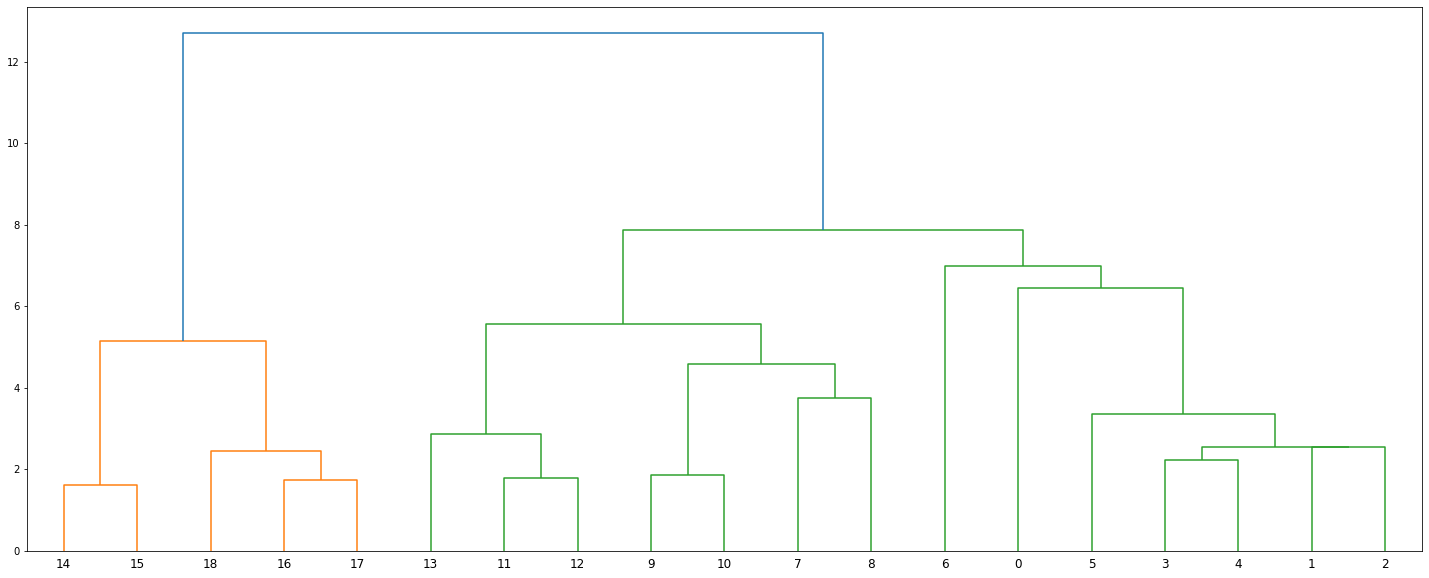

In [77]:
Z = linkage(df)
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

# we feed linkage with original data and than fit linkage metrics this into a dendrogram
# important: scale data set before doing this and also before using any clustering alg (and also for any other distance based alg)

Two ways to read this:
1. How many clusters do I want to have
2. How much distance do I accept

Y-axis shows the euclid distance


Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

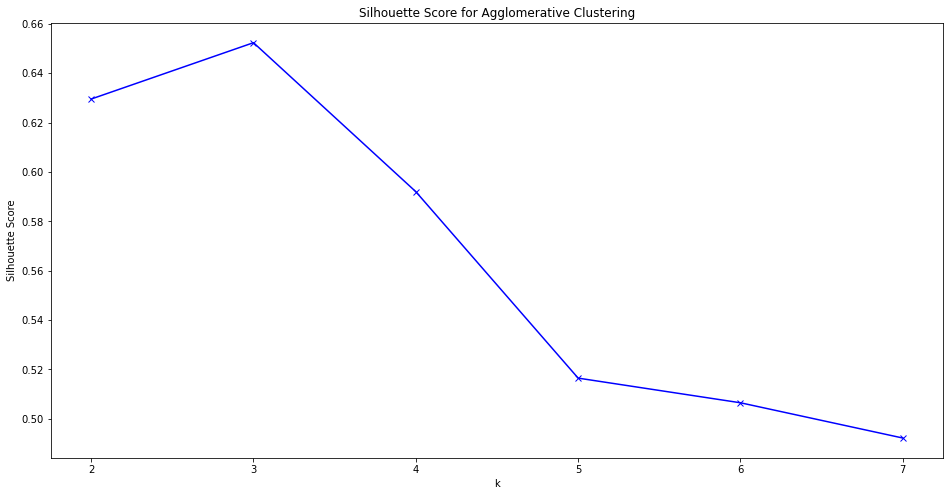

In [78]:
K = range(2, 8)
silhouette = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(df)
    silhouette.append(silhouette_score(df, model.fit_predict(df)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## Example with generated data

In [79]:
from sklearn.datasets import make_classification
help(make_classification)

# generates data which is good for clustering: also normally distributed with STD of 1

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

In [80]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

pd.DataFrame(X).describe()

,0,1
count,1000.000000,1000.000000
mean,-0.000778,-0.971083
std,1.157922,1.109568
min,-2.933792,-4.887411
25%,-1.041307,-1.686809
50%,0.163985,-0.986916
75%,1.015676,-0.258486
max,2.350330,3.981227


## K-Means

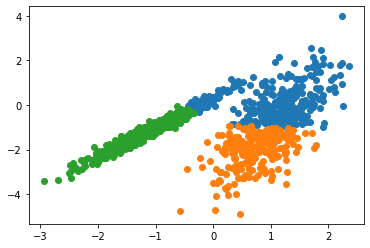

In [82]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state = 1234)
model.fit(X)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for KMeans')

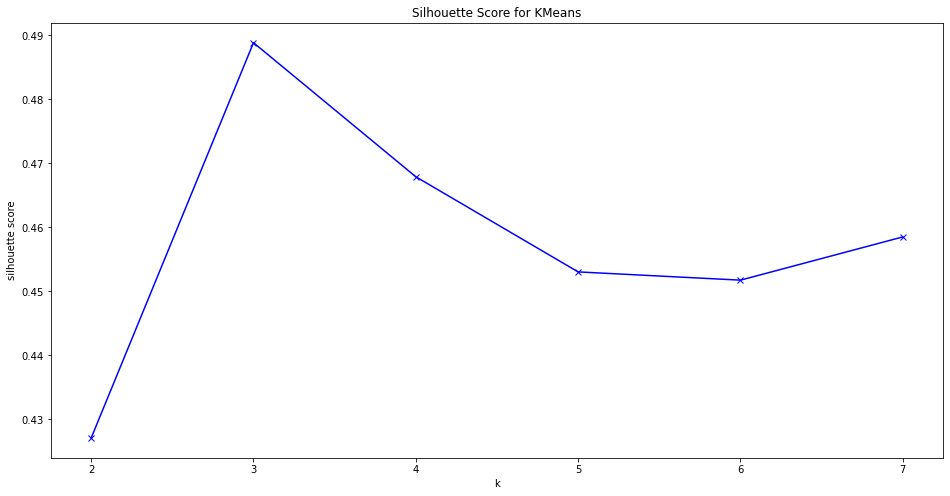

In [83]:
K = range(2, 8)
silhouette_kmeans = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    silhouette_kmeans.append(silhouette_score(X, model.fit_predict(X)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_kmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for KMeans')

## Hierarchical Clustering (Agglomerative)

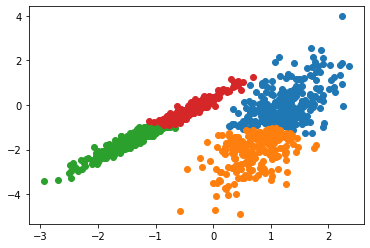

In [84]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

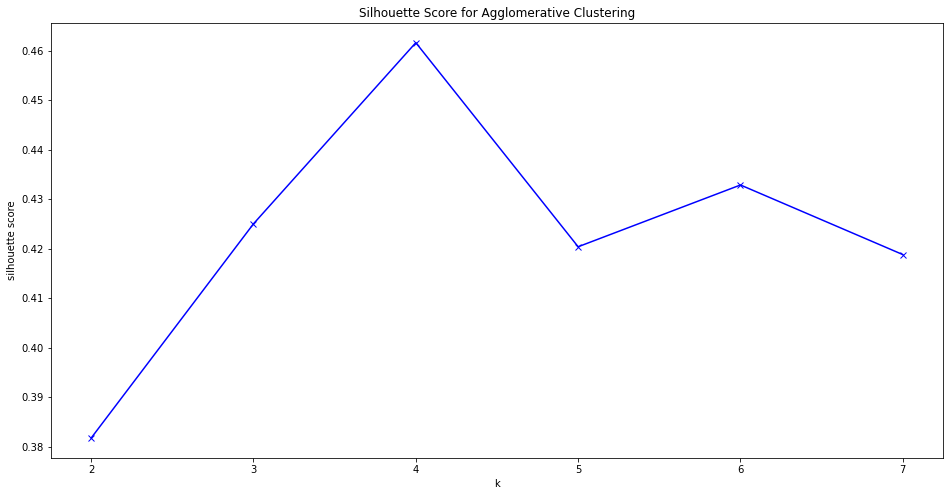

In [85]:
K = range(2, 8)
silhouette_hc = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    silhouette_hc.append(silhouette_score(X, model.fit_predict(X)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_hc, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## DBSCAN

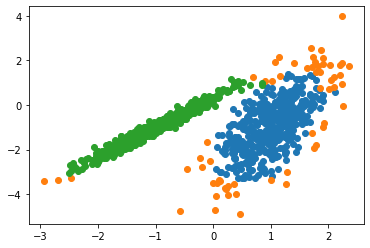

In [86]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10) 
# min_samples: amount of points to have a neighbourhood and not just noise; eps: max distance for still being considered neighbourhood

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

In [88]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

{0, 1, 2, 3, 4, 5, 6, -1}
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
{0, 1, 2, 3, -1}
{0, 1, 2, -1}
{0, 1, 2, -1}
{0, 1, -1}
{0, -1}
{0, -1}
[0.1, 0.12, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5]
[8, 10, 5, 4, 4, 3, 2, 2]
[-0.23929205731297043, -0.07744654039359893, 0.07019751684012232, 0.265085360873157, 0.25643691416479014, 0.4157241178607082, 0.4613474365032591, 0.4831114571736628]


Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

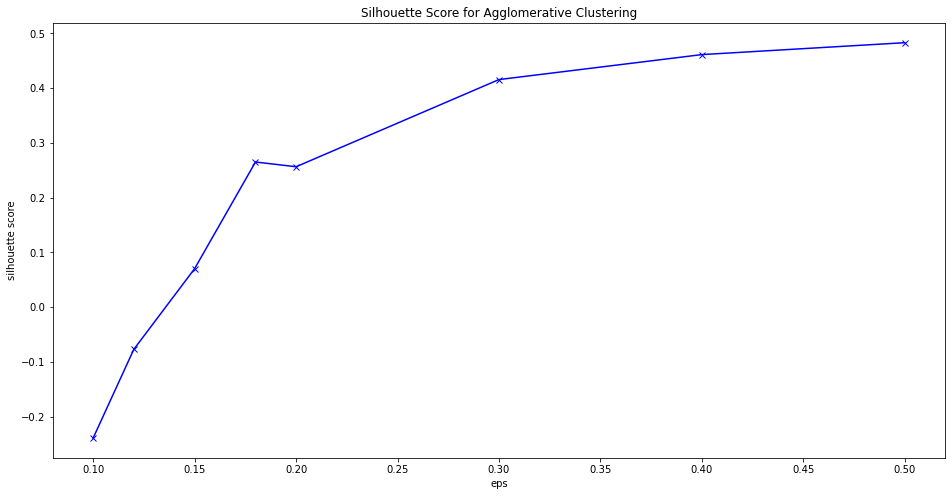

In [87]:
eps_vector = [0.1, 0.12, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5]
silhouette_dbs = []
n_clusters = []

for e in eps_vector:
    model = DBSCAN(eps = e, min_samples=10)
    clusters = set(model.fit_predict(X))
    n_clusters.append(len(clusters))
    print(clusters)
    model.fit(X)
    silhouette_dbs.append(silhouette_score(X, model.fit_predict(X)))

print(eps_vector)
print(n_clusters)  
print(silhouette_dbs)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(eps_vector, silhouette_dbs, 'bx-')
plt.xlabel('eps')
plt.ylabel('silhouette score')
plt.title('Silhouette Score for Agglomerative Clustering')


# cluster -1, will have all the noise
# cant define number of cluster in advance; need to change other parameters

## Evaluating Unsupervised Learning Algorithms

In most cases, we do not have a source of truth!

In [92]:
print("silhouette_kmeans")
print(silhouette_kmeans)
print("silhouette_hc")
print(silhouette_hc)
print("silhouette_dbs")
print(silhouette_dbs)

silhouette_kmeans
[0.4270730877908618, 0.48885199741219676, 0.4678997710674995, 0.45303338914344127, 0.4517445254610396, 0.4585003447905865]
silhouette_hc
[0.3817438924699895, 0.42500719014422195, 0.4615892679053654, 0.42037434920081196, 0.4328504325947332, 0.4187951964352476]
silhouette_dbs
[-0.23929205731297043, -0.07744654039359893, 0.07019751684012232, 0.265085360873157, 0.25643691416479014, 0.4157241178607082, 0.4613474365032591, 0.4831114571736628]


In [89]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.45303338914344127


In [90]:
model = AgglomerativeClustering(n_clusters=5)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.42037434920081196


In [91]:
model = DBSCAN(eps = 0.2, min_samples=10)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.25643691416479014


## PCA

In [105]:
from sklearn import datasets
X_pca = datasets.load_diabetes()['data']
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [106]:
from sklearn.decomposition import PCA

help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [107]:
pca = PCA()
pca.fit(X_pca)
components = pca.transform(X_pca)
print(pd.DataFrame(components))

# paramter to chose: n_components = 
# when selected components is chosen higher, explanatority power of the first ones will go down

            0         1         2         3         4         5         6  \
0    0.027931 -0.092601  0.028027 -0.003939 -0.012207 -0.048099 -0.008553   
1   -0.134686  0.065263  0.001328 -0.022356 -0.006813 -0.048184  0.010674   
2    0.012945 -0.077764  0.035164 -0.037647 -0.055357 -0.052931 -0.021994   
3    0.002345  0.018182 -0.095750  0.065318  0.012154  0.021181  0.022933   
4   -0.035981  0.038621 -0.002724 -0.006541 -0.006343 -0.038746  0.020760   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.058958 -0.049275  0.044173 -0.031215  0.009718 -0.022801  0.018761   
438  0.060155  0.036211 -0.083249 -0.053914 -0.004472  0.046301 -0.055821   
439 -0.009763 -0.057337  0.023596 -0.064372 -0.006739 -0.002154 -0.030225   
440  0.032956  0.009994 -0.041321  0.076903  0.005691 -0.026489  0.025956   
441 -0.090561  0.189108 -0.002301 -0.010493  0.028531  0.078345  0.011666   

            7         8         9  
0    0.036028 -0.008613 -0.002329  
1  

In [108]:
round(pd.DataFrame(pca.explained_variance_ratio_), 5)

,0
0,0.40242
1,0.14923
2,0.12060
3,0.09555
4,0.06622
5,0.06027
6,0.05366
7,0.04337
8,0.00783
9,0.00086


In [109]:
round(pd.DataFrame(components).corr(), 3)
# correlation of new dataset

,0,1,2,3,4,5,6,7,8,9
0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
1,-0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
2,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
3,0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0
4,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0
5,-0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0
6,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0
7,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0
8,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0
9,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,1.0


In [110]:
round(pd.DataFrame(X_pca).corr(), 2)
# correlation of original dataset

,0,1,2,3,4,5,6,7,8,9
0,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
1,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
2,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
3,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
4,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
5,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
6,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
7,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
8,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
9,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00
